In [84]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm

# 設定中文字體
matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

In [85]:
URL = 'Iris.csv'
df = pd.read_csv(URL)
df = df.iloc[:,1:] #去掉id的資料
df_ = df.drop(columns=['Species']).copy() #去掉Species的資料
print(df_)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


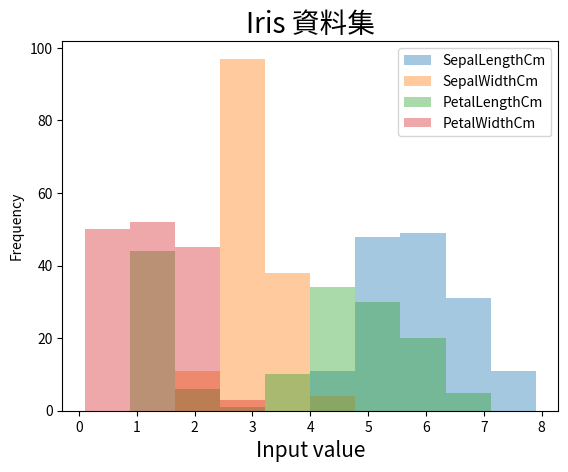

In [86]:
# 繪製 Histogram
df_.plot.hist(alpha = 0.4)
plt.legend()
plt.title('Iris 資料集', fontsize = 20)
plt.xlabel('Input value', fontsize = 15)
plt.show()

In [87]:
def Gaus_neuron(df, n, step, s): # (Data, 神經元數量, 步長, 高斯分佈的標準差)

    neurons_list = list()
    x_axis_list = list()
    t = 0

    for col in df.columns:

        vol = df[col].values
        min_ = np.min(vol)
        max_ = np.max(vol)
        x_axis = np.arange(min_, max_, step)#根據最小值、最大值和步長生成x軸
        x_axis[0] = min_
        x_axis[-1] = max_
        x_axis_list.append(np.round(x_axis, 10)) #四捨五入到小數點後10位
        neurons = np.zeros((n, len(x_axis))) #用來存儲 n 個神經元在 x_axis 上的響應

        for i in range(n): #計算每個神經元的響應
            loc = (max_ - min_) * (i /(n-1)) + min_
            neurons[i] = norm.pdf(x_axis, loc, s[t])
            neurons[i] = neurons[i] / np.max(neurons[i])

        neurons_list.append(neurons) # 存儲結果並更新索引
        t += 1

    return neurons_list, x_axis_list


In [88]:
sigm = [0.1, 0.1, 0.2, 0.1] #高斯分佈的參數
d = Gaus_neuron(df_, 10, 0.001, sigm) #產生高斯分佈


1. 使用 "SepalWidthCm"(花萼寬度) 特徵的前五個數據點進行分析
2. 對每個點，計算跟高斯分佈（前突觸神經元）的交點，並用這些交點來表示點的神經元響應。


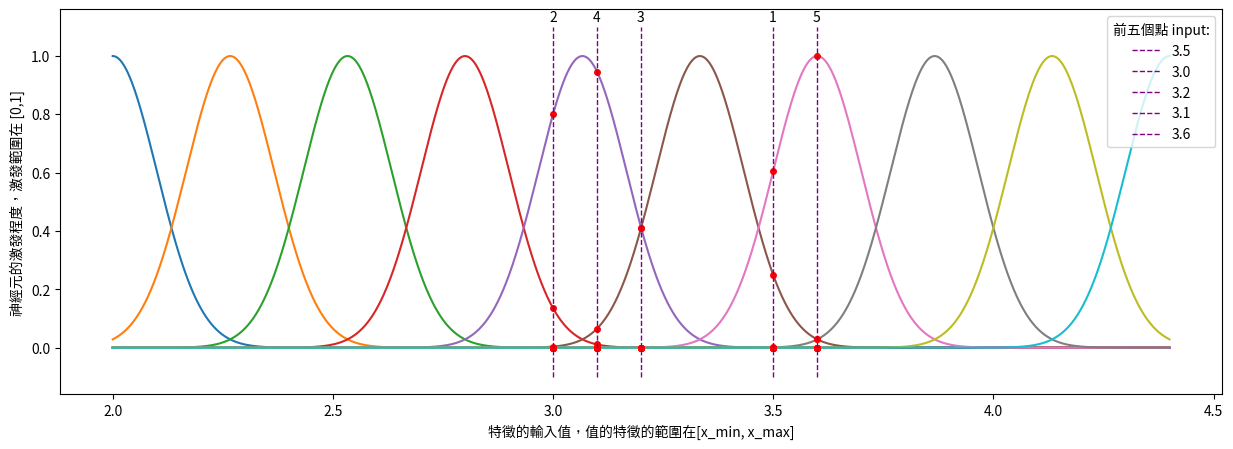

In [89]:
x_input = 5
fig, ax = plt.subplots(1)

fig.set_figheight(5)
fig.set_figwidth(15)

ax.set(ylabel = df_.columns[1])

for i in range(len(d[0][1])):
    ax.plot(d[1][1], d[0][1][i])

for n in range(x_input):

    plt.plot(np.tile(df_['SepalWidthCm'][n], (10,1)), 
            d[0][1][np.tile(d[1][1] == df_['SepalWidthCm'][n], (10,1))], 
            'ro', markersize=4)

    plt.vlines(x = df_['SepalWidthCm'][n], ymin = - 0.1, ymax = 1.1, 
            colors = 'purple', ls = '--', lw = 1, label = df_['SepalWidthCm'][n])

    plt.text(df_['SepalWidthCm'][n] * 0.997, 1.12, n + 1, size = 10)


plt.legend(title = "前五個點 input:")

ax.set_xlabel('特徵的輸入值，值的特徵的範圍在[x_min, x_max]')
ax.set_ylabel('神經元的激發程度，激發範圍在 [0,1]')

plt.show()

3. 使用Boole矩陣計算並輸出交點的值並儲存在(five_x)， 10個高斯神經元上的響應值設定完成

In [90]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
five_x = np.zeros((5, 10))

for n in range(x_input):
    five_x[n,:] = d[0][1][np.tile(d[1][1] == df_['SepalWidthCm'][n], (10,1))]
five_x


array([[0.000000, 0.000000, 0.000000, 0.000000, 0.000084, 0.249354,
        0.606531, 0.001204, 0.000000, 0.000000],
       [0.000000, 0.000000, 0.000019, 0.135335, 0.800742, 0.003866,
        0.000000, 0.000000, 0.000000, 0.000000],
       [0.000000, 0.000000, 0.000000, 0.000335, 0.411115, 0.411115,
        0.000335, 0.000000, 0.000000, 0.000000],
       [0.000000, 0.000000, 0.000000, 0.011109, 0.945965, 0.065729,
        0.000004, 0.000000, 0.000000, 0.000000],
       [0.000000, 0.000000, 0.000000, 0.000000, 0.000001, 0.028566,
        1.000000, 0.028566, 0.000001, 0.000000]])

4. 設定threshold為0.1，激發度> 0.1的值轉換為1 - five_x，小於或等於0.1的值替換為 np.nan，表示未被激發

In [91]:
five_x = np.where(five_x > 0.1, 1 - five_x, np.nan)
five_x[five_x == 0] = 0.0001 #避免後續計算中的問題
five_x

array([[nan, nan, nan, nan, nan, 0.750646, 0.393469, nan, nan, nan],
       [nan, nan, nan, 0.864665, 0.199258, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, 0.588885, 0.588885, nan, nan, nan, nan],
       [nan, nan, nan, nan, 0.054035, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, 0.000100, nan, nan, nan]])

In [92]:
def Lat_Spike(df, d, n):

    for i in range(len(df.columns)):

        k = len(df.iloc[:, i])
        st1 = np.tile(d[1][i], (k, 1))
        st2 = df.iloc[:, i].values.reshape(-1, 1)
        ind = (st1 == st2)
        exc = np.tile(d[0][i], (k, 1)).reshape(k, n, len(d[0][i][0]))[
            np.repeat(ind, n, axis=0).reshape(k, n, len(ind[0]))].reshape(k, n)
        lat_neuron = np.transpose(np.where(exc > 0.1, 1 - exc, np.nan))

        if i == 0:
            lat_neuron_total = lat_neuron
        else:
            lat_neuron_total = np.concatenate((lat_neuron_total, lat_neuron), axis = 0)

    lat_neuron_total[lat_neuron_total == 0] = 0.0001

    return lat_neuron_total

fin = Lat_Spike(df_, d, 10)

In [93]:
Final_df = pd.DataFrame(fin)
Final_df

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.393469,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.864665,0.000100,0.393469,NaN,NaN,0.393469,NaN,NaN,0.864665,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000100,0.864665,NaN,NaN,0.393469,NaN,NaN,0.393469,NaN,0.864665,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,0.393469,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.393469,NaN,NaN,NaN,NaN,NaN,NaN,0.000100
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000100,0.864665,0.393469,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000100,0.864665,NaN,0.393469,0.000100,0.000100,NaN,0.864665,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.864665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 訓練 LIF 神經元
1. 子樣本大小為 60：每種花類型的前 20 個值
2. 共有 150 個資料集，其中前 50 筆記錄屬於 Iris-setosa，50-100 筆屬於 Iris-versicolor，100-150 筆記錄屬於 Iris-virginica

In [94]:
def model_data(ind, ind_type, lat_ne, start, end):
    
    train_stack = np.vstack((lat_ne[ind_type[ind, 0] + start:ind_type[ind, 0] + end],
                            lat_ne[ind_type[ind, 1] + start:ind_type[ind, 1] + end],
                            lat_ne[ind_type[ind, 2] + start:ind_type[ind, 2] + end]))
    train_stack = np.where(train_stack > 0, train_stack, 0)
    
    return train_stack